In [49]:
#Importing all Required  Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
import math
#Library for one hot encoding
from sklearn.preprocessing import OneHotEncoder
#train test split
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [50]:
#load the data
df=pd.read_csv("./Data/cleaned_merged_all_data.csv")
df.head()

,Unnamed: 0,Area / Locality,CITY,divisionname,regionname,Districtname,statename,Pin code,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,Partner Type_x,Data Origin_x,Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Outstanding Amt,Parts Total,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State,Description,Item Category,Order Quantity,Net value
0,0.00,MAJIWADA,Thane,Thane Central,Mumbai,Thane,MAHARASHTRA,400601,NaN,NaN,Retail,67849,1.00,Z007,NaN,02-01-2015,7005200002.00,11:30:36,168303,13-12-2014,14:29:43,49317.00,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,0.00,2348.75,BC01,THANE,NaN,NO,0.00,KA19MA1291,RUPESH,4051.95,BC01FS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
1,1.00,THNAE,THNAE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,NaN,NaN,Retail,84419,1.00,Z001,NaN,03-01-2015,7005200003.00,10:07:32,173997,02-01-2015,14:12:18,78584.00,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,0.00,BC01,THANE,NaN,NO,0.00,MH43R3046,PRASHANT,1001.29,BC01SA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
2,2.00,THANE,THANE[W],Thane Central,Mumbai,Thane,MAHARASHTRA,400607,NaN,NaN,Retail,81055,1.00,Z005,NaN,03-01-2015,7005200004.00,11:12:57,173889,02-01-2015,11:40:44,33985.00,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,0.00,52.95,BC01,THANE,NaN,NO,0.00,AP09AX0582,IMRAN,233.14,BC01SA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
3,3.00,THNAE,THNAE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,NaN,NaN,Retail,84419,1.00,Z001,NaN,03-01-2015,7005200005.00,11:40:44,174158,03-01-2015,10:12:32,78584.00,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,0.00,BC01,THANE,NaN,NO,0.00,MH43R3046,PRASHANT,0.00,BC01SA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
4,4.00,THANE,THANE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,NaN,NaN,Retail,18980,1.00,Z005,NaN,03-01-2015,7005200006.00,12:07:17,173860,02-01-2015,10:45:42,50057.00,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,0.00,944.16,BC01,THANE,NaN,NO,0.00,MH04CD9768,DAYANAND,2747.12,BC01SA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan


In [51]:
columns_to_be_removed = df.isnull().sum()[df.isnull().sum().sort_values() > 197285].index

In [52]:
df = df.drop(columns=columns_to_be_removed)

In [53]:
df.shape

(492315, 33)

In [54]:
df.dropna(inplace=True)

In [55]:
df.shape

(441883, 33)

In [56]:
import datetime as dt
df["Invoice Date"]=pd.to_datetime(df["Invoice Date"],dayfirst=True)

In [57]:
df['years']=df['Invoice Date'].dt.year

In [58]:

#For Customer Life time value prediction we need data only of 2015 hence Subset the data
cltv_df=df[['Customer No.','Cust Type','Invoice No','Make','Model','Total Amt Wtd Tax.','divisionname','years']]

#Subsetting the data
#cltv_df=cltv_df[cltv_df['years']==2015]
cltv_df

,Customer No.,Cust Type,Invoice No,Make,Model,Total Amt Wtd Tax.,divisionname,years
0,67849,Retail,7005200002.00,GENERAL MOTORS,SPARK,4051.95,Thane Central,2015
1,84419,Retail,7005200003.00,TATA MOTORS,INDICA,1001.29,Thane Central,2015
2,81055,Retail,7005200004.00,MARUTI SUZUKI,ZEN,233.14,Thane Central,2015
3,84419,Retail,7005200005.00,TATA MOTORS,INDICA,0.00,Thane Central,2015
4,18980,Retail,7005200006.00,HYUNDAI,SANTRO XING,2747.12,Thane Central,2015
...,...,...,...,...,...,...,...,...
492309,203820,Retail,7231000017.00,MARUTI SUZUKI,ALTO,4458.15,Tambaram,2016
492310,170411,Retail,7231000018.00,NISSAN,MICRA,6832.08,Chennai City South,2016
492311,48811,Retail,7231000019.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,9187.71,Tambaram,2016
492312,204067,Retail,7231000020.00,HONDA,AMAZE,11100.00,Chennai City South,2016


In [59]:
#Groupby of data
cltv_group=cltv_df.groupby(['Customer No.','Cust Type','divisionname','Make','Model']).agg({'Invoice No':'nunique','Total Amt Wtd Tax.':'mean'}).reset_index()
#cltv_group.drop('year',1,inplace=True)
cltv_group

,Customer No.,Cust Type,divisionname,Make,Model,Invoice No,Total Amt Wtd Tax.
0,10000,Retail,Secunderabad,MARUTI SUZUKI,WAGONR,7,247.93
1,100000,Retail,Surat,HYUNDAI,ACCENT,1,6026.05
2,100001,Retail,Pune Moffusil,MAHINDRA & MAHINDRA,BOLERO,1,697.59
3,100001,Retail,Pune Moffusil,SKODA,SUPERB,1,1058.44
4,100001,Retail,Pune Moffusil,TOYOTA,INNOVA,1,2507.72
...,...,...,...,...,...,...,...
238745,PLX109,Franchise,Tambaram,TATA MOTORS,INDIGO,1,2217.30
238746,PLX109,Retail,Tambaram,TATA MOTORS,INDICA,1,842.93
238747,PLX241,Franchise,Nainital,MARUTI SUZUKI,RITZ,1,3477.37
238748,PLX277,Retail,Jalpaiguri,TATA MOTORS,SUMO,1,6870.95


In [60]:
#finding customer value for year 2015
cltv_group['customer_value']=cltv_group['Invoice No']*cltv_group['Total Amt Wtd Tax.']

In [61]:
cltv_group

,Customer No.,Cust Type,divisionname,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Secunderabad,MARUTI SUZUKI,WAGONR,7,247.93,1735.52
1,100000,Retail,Surat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Pune Moffusil,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Pune Moffusil,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Pune Moffusil,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
238745,PLX109,Franchise,Tambaram,TATA MOTORS,INDIGO,1,2217.30,2217.30
238746,PLX109,Retail,Tambaram,TATA MOTORS,INDICA,1,842.93,842.93
238747,PLX241,Franchise,Nainital,MARUTI SUZUKI,RITZ,1,3477.37,3477.37
238748,PLX277,Retail,Jalpaiguri,TATA MOTORS,SUMO,1,6870.95,6870.95


In [62]:
#Removing Customers with zero value
zero_group=cltv_group[cltv_group['customer_value']<=0].index
cltv_group.drop(zero_group,0,inplace=True)
cltv_group

,Customer No.,Cust Type,divisionname,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Secunderabad,MARUTI SUZUKI,WAGONR,7,247.93,1735.52
1,100000,Retail,Surat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Pune Moffusil,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Pune Moffusil,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Pune Moffusil,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
238745,PLX109,Franchise,Tambaram,TATA MOTORS,INDIGO,1,2217.30,2217.30
238746,PLX109,Retail,Tambaram,TATA MOTORS,INDICA,1,842.93,842.93
238747,PLX241,Franchise,Nainital,MARUTI SUZUKI,RITZ,1,3477.37,3477.37
238748,PLX277,Retail,Jalpaiguri,TATA MOTORS,SUMO,1,6870.95,6870.95


In [63]:
#Creating Dataframe for Modelling 
model_df=cltv_group[['Customer No.','Cust Type','divisionname','Make','Invoice No','Total Amt Wtd Tax.','customer_value']]
model_df

,Customer No.,Cust Type,divisionname,Make,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Secunderabad,MARUTI SUZUKI,7,247.93,1735.52
1,100000,Retail,Surat,HYUNDAI,1,6026.05,6026.05
2,100001,Retail,Pune Moffusil,MAHINDRA & MAHINDRA,1,697.59,697.59
3,100001,Retail,Pune Moffusil,SKODA,1,1058.44,1058.44
4,100001,Retail,Pune Moffusil,TOYOTA,1,2507.72,2507.72
...,...,...,...,...,...,...,...
238745,PLX109,Franchise,Tambaram,TATA MOTORS,1,2217.30,2217.30
238746,PLX109,Retail,Tambaram,TATA MOTORS,1,842.93,842.93
238747,PLX241,Franchise,Nainital,MARUTI SUZUKI,1,3477.37,3477.37
238748,PLX277,Retail,Jalpaiguri,TATA MOTORS,1,6870.95,6870.95


In [64]:
#Renaming Columns
model_df.columns=['Cust_no.','Cust','State','Make','Count_invoice','Avg_revenue','customer_value']

model_df

,Cust_no.,Cust,State,Make,Count_invoice,Avg_revenue,customer_value
0,10000,Retail,Secunderabad,MARUTI SUZUKI,7,247.93,1735.52
1,100000,Retail,Surat,HYUNDAI,1,6026.05,6026.05
2,100001,Retail,Pune Moffusil,MAHINDRA & MAHINDRA,1,697.59,697.59
3,100001,Retail,Pune Moffusil,SKODA,1,1058.44,1058.44
4,100001,Retail,Pune Moffusil,TOYOTA,1,2507.72,2507.72
...,...,...,...,...,...,...,...
238745,PLX109,Franchise,Tambaram,TATA MOTORS,1,2217.30,2217.30
238746,PLX109,Retail,Tambaram,TATA MOTORS,1,842.93,842.93
238747,PLX241,Franchise,Nainital,MARUTI SUZUKI,1,3477.37,3477.37
238748,PLX277,Retail,Jalpaiguri,TATA MOTORS,1,6870.95,6870.95


In [65]:
#Final dummyencoded dataframe
A=pd.get_dummies(data=model_df, columns=['Cust', 'State','Make'])

In [66]:
final_df=pd.DataFrame(A)

In [67]:
final_df.drop('Cust_no.',1,inplace=True)
final_df

,Count_invoice,Avg_revenue,customer_value,Cust_Corporate others,Cust_Corporate- M&M,Cust_Fleets,Cust_Franchise,Cust_MFCWL,Cust_Retail,State_Adilabad,State_Agra,State_Ahmedabad City,State_Ahmednagar,State_Ajmer,State_Akola,State_Aligarh,State_Alipore H.O,State_Allahabad,State_Alleppey,State_Almora,State_Alwar,State_Alwaye,State_Amalapuram,State_Amaravati,State_Ambala,State_Amritsar,State_Anakapalle,State_Anand,State_Anantapur,State_Anna Road H.O,State_Arakkonam,State_Arunachal Pradesh,State_Asansol,State_Aska,State_Aurangabad(Bihar),State_Aurangabad(Maharashtra),State_Azamgarh,State_Bagalkot,State_Bahraich,State_Balaghat,State_Balangir,State_Balasore,State_Ballia,State_Banasanktha,State_Banda,State_Bangalore East,State_Bangalore South,State_Bangalore West,State_Barasat,State_Bardoli,State_Bareilly,State_Barmer,State_Bastar,State_Basti,State_Beed,State_Begusarai,State_Belgaum,State_Bellary,State_Berhampur,State_Bhadrak,State_Bhagalpur,State_Bharatpur,State_Bharuch,State_Bhatinda,State_Bhavnagar,State_Bhilwara,State_Bhimavaram,State_Bhiwani,State_Bhojpur,State_Bhopal,State_Bhubaneswar,State_Bhusaval,State_Bidar,State_Bijapur,State_Bijnor,State_Bikaner,State_Bilaspur,State_Birbhum,State_Bulandshahar,State_Buldana,State_Burdwan,State_Calcutta South,State_Calicut,State_Cannanore,State_Chandigarh,State_Chandrapur,State_Changanacherry,State_Channapatna,State_Chengalpattu,State_Chennai City Central,State_Chennai City North,State_Chennai City South,State_Chhatarpur,State_Chhindwara,State_Chikmagalur,State_Chikodi,State_Chitradurga,State_Chittoor,State_Chittorgarh,State_Churu,State_Coimbatore,State_Cooch Behar,State_Cuddalore,State_Cuddapah,State_Cuttack City,State_Cuttack North,State_Cuttack South,State_Darbhanga,State_Darjeeling,State_Darrang,State_Dehra Gopipur,State_Dehradun,State_Delhi East,State_Delhi GPO,State_Delhi North,State_Deoria,State_Dhanbad,State_Dharamsala,State_Dharmapuri,State_Dharwad,State_Dhenkanal,State_Dholpur,State_Dhule,State_Dindigul,State_Dungarpur,State_Durg,State_East Champaran,State_Eluru,State_Ernakulam,State_Erode,State_Etah,State_Etawah,State_Faizabad,State_Faridabad,State_Faridkot,State_Fatehgarh,State_Ferozpur,State_Gadag,State_Gandhinagar,State_Gaya,State_Ghaziabad,State_Ghazipur,State_Giridih,State_Goa,State_Goalpara,State_Gonda,State_Gondal,State_Gorakhpur,State_Gudivada,State_Gudur,State_Gulbarga,State_Guna,State_Guntur,State_Gurdaspur,State_Gurgaon,State_Guwahati,State_Gwalior,State_Hamirpur,State_Hanamkonda,State_Hardoi,State_Hassan,State_Haveri,State_Hazaribagh,State_Hindupur,State_Hissar,State_Hooghly South,State_Hoshangabad,State_Hoshiarpur,State_Howrah,State_Hyderabad City,State_Hyderabad South East,State_Idukki,State_Indore City,State_Indore Moffusil,State_Irinjalakuda,State_Jabalpur,State_Jaipur City,State_Jaipur Moffusil,State_Jalandhar,State_Jalgaon,State_Jalpaiguri,State_Jammu,State_Jamnagar,State_Jaunpur,State_Jhansi,State_Jhunjhunu,State_Jodhpur,State_Junagadh,State_Kakinada,State_Kanchipuram,State_Kanniyakumari,State_Kanpur City,State_Kanpur Moffusil,State_Kapurthala,State_Karaikudi,State_Karimnagar,State_Karnal,State_Karur,State_Karwar,State_Kasaragod,State_Keonjhar,State_Khammam,State_Khandwa,State_Kheda,State_Kodagu,State_Kolar,State_Kolhapur,State_Kolkata Central,State_Kolkata East,State_Kolkata North,State_Koraput,State_Kota,State_Kottayam,State_Kovilpatti,State_Krishnagiri,State_Kumbakonam,State_Kurnool,State_Kurukshetra,State_Kutch,State_Lakshadweep,State_Lucknow,State_Ludhiana City,State_Ludhiana Moffusil,State_Machilipatnam,State_Madhubani,State_Madurai,State_Mahabubnagar,State_Mahesana,State_Mainpuri,State_Malda,State_Malegaon,State_Mandi,State_Mandsaur,State_Mandya,State_Mangalore,State_Manjeri,State_Mathura,State_Mavelikara,State_Mayiladuthurai,State_Mayurbhanj,State_Medak,State_Meerut,State_Mirzapur,State_Monghyr,State_Moradabad,State_Morena,State_Mumbai East,State_Mumbai North,State_Mumbai North East,State_Mumbai North West,State_Mumbai South,State_Mumbai West,State_Murshi

In [68]:
#Train Test Split 
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [69]:

#Implementing Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'accuracy vs max_depth')

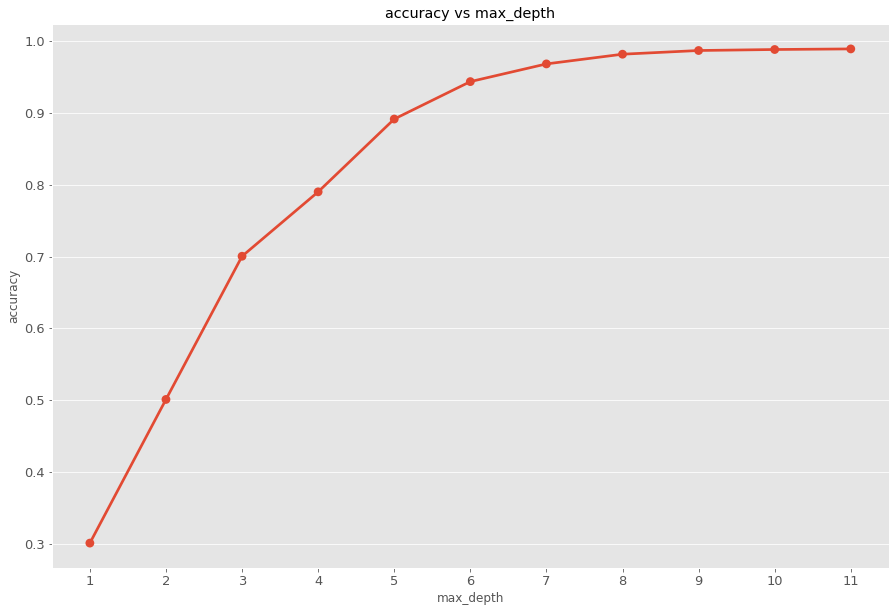

In [70]:
max_depth_range = list(range(1,12))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 18)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth_range
y=accuracy

plt.figure(figsize=(15,10))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')

In [76]:
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)
dt_reg = DecisionTreeRegressor(max_depth=6, random_state = 18)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)
#Evaluation metric
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*100)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

#accuracy score on train data
train_score=dt_reg.score(X_train,y_train)
print('train score:',train_score)
print('=='*100)

#accuracy score on test data
test_score=dt_reg.score(X_test,y_test)
print('test score:',test_score)
print('=='*100)

mse score: 26587137.248038307
Rmse score: 5156.271642188599
train score: 0.9572725677956557
test score: 0.9323871545859145


In [77]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)

R2 score: 0.9323871545859145


In [73]:
#Repeated k fold and cross val score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rkf=RepeatedKFold(n_splits=5, n_repeats=5, random_state=9)


#Crossvalidation process
scores = cross_val_score(dt_reg, X, y, cv=rkf, scoring='r2')
print('scores',scores)
print('=='*100)

print('Mean_score:',scores.mean())
print('=='*100)

print('std_score:',scores.std())

scores [0.89233605 0.89880949 0.89294582 0.88699435 0.89509395 0.90110986
 0.89889682 0.84956779 0.88558907 0.90670734 0.89722632 0.86490512
 0.90940605 0.89971366 0.8660265  0.91471149 0.89737497 0.89548646
 0.86684858 0.89004672 0.87800346 0.90221545 0.90461404 0.85364514
 0.90566063]
Mean_score: 0.890157405782427
std_score: 0.017081533109677652


In [74]:
from sklearn.metrics import mean_squared_log_error
#For test
mean_squared_log_error(dt_reg.predict(X_test),y_test)

0.6991269838547398

In [75]:
mean_squared_log_error(dt_reg.predict(X_train),y_train)

0.6986970990187303